In [150]:
import ares
import matplotlib.pyplot as plt
import numpy as np

In [155]:
pf = \
    {
    'radiative_transfer':False,
    'verbose':False,
    'dark_matter_heating':True, 
    'include_cgm':False, 
    # 'initial_v_stream':0, 
    'initial_redshift':1010, 
    'include_He':True
    }

V_rms = 29000 # m/s

N = 20 # number of initial_v_stream
N_z = 100

initial_v_stream_list = np.random.normal(0, V_rms, N)
initial_v_stream_list = abs(initial_v_stream_list)
sim_dict = {initial_v_stream:0 for initial_v_stream in initial_v_stream_list}

z_array = np.linspace(6, 300, N_z)
dTb_dict = {initial_v_stream:0 for initial_v_stream in initial_v_stream_list}

In [156]:
for i, initial_v_stream in enumerate(initial_v_stream_list):
    print("initial_v_stream =", initial_v_stream, 'm/s')
    sim_dict[initial_v_stream] = ares.simulations.Global21cm(initial_v_stream = initial_v_stream, **pf)
    sim = sim_dict[initial_v_stream]
    sim.run()
    
    dTb_dict[initial_v_stream] = np.interp(z_array, sim.history['z'][::-1], sim.history['dTb'][::-1])
    # sim_dict[initial_v_stream].save()

initial_v_stream = 26631.454323536695
initial_v_stream = 1985.3875194100146
initial_v_stream = 25573.74094622716
initial_v_stream = 13158.83287071018
initial_v_stream = 7644.872894604993
initial_v_stream = 26411.012033045612
initial_v_stream = 13404.681554546341
initial_v_stream = 11161.41470800323
initial_v_stream = 45097.85048214692
initial_v_stream = 58556.58937893228
initial_v_stream = 2641.6565967040747
initial_v_stream = 26771.889167860456
initial_v_stream = 25591.953684634125
initial_v_stream = 8802.49372558476
initial_v_stream = 19616.209127240305
initial_v_stream = 35976.853085217495
initial_v_stream = 2952.4728686312187
initial_v_stream = 1425.8745783917757
initial_v_stream = 38810.22977452894
initial_v_stream = 18795.663917216265


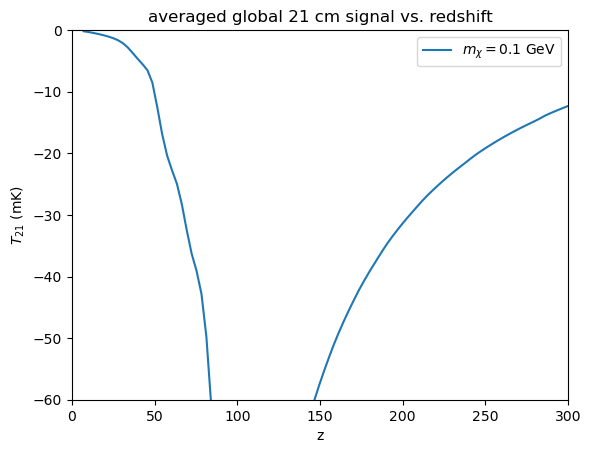

In [157]:
dTb_average = np.average(list(dTb_dict.values()), axis=0)

plt.plot(1+z_array, dTb_average, label=r'$m_{\chi} = 0.1$ GeV')#, label=r'DM, $V{\chi b,0}=$'+'{:.0f}m/s'.format(sim.pf['initial_v_stream']))
plt.title("averaged global 21 cm signal vs. redshift")
plt.xlabel("z")
plt.ylabel(r"$T_{21}$ (mK)")
plt.xlim(0, 300)
plt.ylim(-60, 0)
plt.legend()
plt.show()

In [158]:
# for initial_v_stream in initial_v_stream_list:
#     sim = sim_dict[initial_v_stream]
#     plt.plot(1+sim.history['z'], sim.history['dTb'], label=r'DM, $V{\chi b,0}=$'+'{:.0f}m/s'.format(sim.pf['initial_v_stream']))
# plt.title("global 21 cm signal vs. redshift")
# plt.xlabel("z")
# plt.ylabel(r"$T_{21}$ (mK)")
# plt.xlim(0, 300)
# plt.ylim(-60, 0)
# plt.legend()
# plt.show()